# **OPTION PRICING USING DEEP NEURAL NETWORK AND BLACK-SCHOLES MODEL**

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTGVUqObfUpPgTe2A_zrHYbhsHJ2lNjUhhKa_x3ms0wuGmxMA-S&usqp=CAU)

## PREPARING THE DATASET

#### GENERATING OPTION PARAMETER :

- Stock Price.
- Strike Price.
- Time to Maturity.
- Dividend Gain.
- Interset Rate.
- Volatality.

In [1]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
seed(1)


# generting Stock Price(S) vector
list1 =[]
for i in range(10000):
    k = gauss(250,50.11)
    list1.append(round(k,2))
    

# generating Strike Price(K) vector
list2 =[]
for i in range(10000):
    k = 0
    k = abs(gauss(322.6,65.9))
    while round(k,2) >= list1[i]:
        k = abs(gauss(322.6,65.9))
    list2.append(round(k,2))
    

# generate maturity time vector
list3 =[]
for i in range(10000):
    k = gauss(541.4,111)
    list3.append(round(int(round(k,2))/365,4))
    

# generate dividend gain vector    
list4 =[]
for i in range(10000):
    k = gauss(1.5,0.31)
    list4.append(round(round(k,2)/100,6))
    
    
# generate risk free interst rate vector
list5 =[]
for i in range(10000):
    k = gauss(2.05,0.2)
    list5.append(round(round(k,2)/100,6))


# generate volatality vector
list6 =[]
for i in range(10000):
    k = gauss(30,10)
    list6.append(round(round(k,2)/100,4))

In [2]:
def listOfTuples(l1, l2,l3,l4,l5,l6): 
    return list(map(lambda x, y,z,w,i,o:(x,y,z,w,i,o), l1, l2,l3,l4,l5,l6)) 

p = listOfTuples(list1,list2,list3,list4,list5,list6)

## FINAL DATASET

In [3]:
import pandas as pd
df = pd.DataFrame(p, columns=["S","K","T","q","r","sigma"])
df.head(50)

,S,K,T,q,r,sigma
0,314.55,187.03,2.0904,0.0167,0.0194,0.4878
1,322.63,276.01,1.6767,0.0159,0.0206,0.2625
2,253.32,198.56,0.8164,0.0118,0.0191,0.3843
3,211.69,197.88,1.8192,0.0204,0.0192,0.1268
4,195.27,170.65,1.5753,0.0157,0.0194,0.1476
5,251.57,196.37,1.1370,0.0145,0.0234,0.1490
6,198.78,180.61,1.6192,0.0138,0.0191,0.3201
7,178.00,165.79,1.6877,0.0159,0.0187,0.2219
8,259.99,243.09,1.9151,0.0190,0.0188,0.3076
9,256.68,185.84,1.3151,0.0164,0.0191,0.2383


In [4]:
pip install sympy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## FORMULA FOR OPTION PRICING BY BLACK SCHOLES

In [5]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()
def black_scholes_call_div(S, K, T, r, q, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
   
    call =  (S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return round(call,2)

In [6]:
df['C'] = df.apply(lambda row : black_scholes_call_div(row['S'], row['K'], row['T'],row['r'],row['q'],row['sigma']),axis = 1)
df.head(50)

,S,K,T,q,r,sigma,C
0,314.55,187.03,2.0904,0.0167,0.0194,0.4878,145.19
1,322.63,276.01,1.6767,0.0159,0.0206,0.2625,67.36
2,253.32,198.56,0.8164,0.0118,0.0191,0.3843,65.96
3,211.69,197.88,1.8192,0.0204,0.0192,0.1268,20.87
4,195.27,170.65,1.5753,0.0157,0.0194,0.1476,29.22
5,251.57,196.37,1.1370,0.0145,0.0234,0.1490,57.00
6,198.78,180.61,1.6192,0.0138,0.0191,0.3201,40.41
7,178.00,165.79,1.6877,0.0159,0.0187,0.2219,26.11
8,259.99,243.09,1.9151,0.0190,0.0188,0.3076,49.49
9,256.68,185.84,1.3151,0.0164,0.0191,0.2383,73.26


### STORING THE DATA IN A PICKLE FILE FOR LATER USE

In [26]:
df.to_pickle("option_dataset.pkl")

In [7]:
df1 = df

### NORMALIZE DATA

In [8]:
## Normalize the data exploiting the fact that the BS Model is linear homogenous in S,K
df1["S"] = df1["S"]/df1["K"]
df1["C"] = df1["C"]/df1["K"]
df1.head()

,S,K,T,q,r,sigma,C
0,1.681816,187.03,2.0904,0.0167,0.0194,0.4878,0.776293
1,1.168907,276.01,1.6767,0.0159,0.0206,0.2625,0.244049
2,1.275786,198.56,0.8164,0.0118,0.0191,0.3843,0.332192
3,1.069790,197.88,1.8192,0.0204,0.0192,0.1268,0.105468
4,1.144272,170.65,1.5753,0.0157,0.0194,0.1476,0.171228


In [9]:
df1.drop(columns = ['K'], inplace = True)

In [10]:
df1.head(50)

,S,T,q,r,sigma,C
0,1.681816,2.0904,0.0167,0.0194,0.4878,0.776293
1,1.168907,1.6767,0.0159,0.0206,0.2625,0.244049
2,1.275786,0.8164,0.0118,0.0191,0.3843,0.332192
3,1.069790,1.8192,0.0204,0.0192,0.1268,0.105468
4,1.144272,1.5753,0.0157,0.0194,0.1476,0.171228
5,1.281102,1.1370,0.0145,0.0234,0.1490,0.290268
6,1.100604,1.6192,0.0138,0.0191,0.3201,0.223742
7,1.073647,1.6877,0.0159,0.0187,0.2219,0.157488
8,1.069522,1.9151,0.0190,0.0188,0.3076,0.203587
9,1.381188,1.3151,0.0164,0.0191,0.2383,0.394210


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S       10000 non-null  float64
 1   T       10000 non-null  float64
 2   q       10000 non-null  float64
 3   r       10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [14]:
 y = df1['C'] #target variable

In [15]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### SPLITTING THE DATASET

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

In [17]:
X_train

,S,T,q,r
2694,1.088512,1.0082,0.0119,0.0204
5140,1.017729,1.6630,0.0145,0.0215
2568,1.103597,1.3808,0.0127,0.0206
3671,1.008654,1.6685,0.0145,0.0225
7427,1.121722,1.4055,0.0109,0.0190
...,...,...,...,...
2895,1.831087,1.2301,0.0181,0.0192
7813,1.157594,1.6384,0.0121,0.0241
905,1.182368,1.3233,0.0130,0.0204
5192,1.040158,0.9973,0.0183,0.0215


In [18]:
y_train

2694    0.152082
5140    0.100574
2568    0.221313
3671    0.182032
7427    0.131110
          ...   
2895    0.829717
7813    0.274809
905     0.284506
5192    0.207149
235     0.172143
Name: C, Length: 8000, dtype: float64

In [33]:
X_test

,S,T,q,r
9953,1.420947,1.6685,0.0150,0.0203
3850,1.109654,1.2301,0.0133,0.0210
4962,1.135993,1.2849,0.0135,0.0175
3886,1.165913,1.6055,0.0168,0.0201
5437,1.110290,1.6055,0.0203,0.0200
...,...,...,...,...
3919,1.221278,1.4986,0.0105,0.0194
162,1.084878,1.0658,0.0142,0.0192
7903,1.082258,1.1534,0.0188,0.0238
2242,1.082944,1.6082,0.0148,0.0163


In [34]:
y_test

9953    0.438087
3850    0.175394
4962    0.226308
3886    0.292043
5437    0.106260
          ...   
3919    0.262407
162     0.145506
7903    0.171435
2242    0.293701
2745    0.638541
Name: C, Length: 2000, dtype: float64

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 4) (2000, 4) (8000,) (2000,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend

In [21]:
def custom_activation(x):
    return backend.exp(x)

## BUILDING THE ANN MODEL

In [22]:
nodes = 120
model = Sequential()

model.add(Dense(nodes, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))
          
model.compile(loss='mse',optimizer='rmsprop')

### TRAINING THE ANN MODEL

In [40]:
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
113/113 - 0s - loss: 0.0072 - val_loss: 0.0029
Epoch 2/20
113/113 - 0s - loss: 0.0081 - val_loss: 0.0031
Epoch 3/20
113/113 - 0s - loss: 0.0068 - val_loss: 0.0024
Epoch 4/20
113/113 - 0s - loss: 0.0073 - val_loss: 0.0034
Epoch 5/20
113/113 - 0s - loss: 0.0085 - val_loss: 0.0026
Epoch 6/20
113/113 - 0s - loss: 0.0080 - val_loss: 0.0049
Epoch 7/20
113/113 - 0s - loss: 0.0056 - val_loss: 0.0035
Epoch 8/20
113/113 - 0s - loss: 0.0053 - val_loss: 0.0027
Epoch 9/20
113/113 - 0s - loss: 0.0057 - val_loss: 0.0030
Epoch 10/20
113/113 - 0s - loss: 0.0064 - val_loss: 0.0024
Epoch 11/20
113/113 - 0s - loss: 0.0066 - val_loss: 0.0023
Epoch 12/20
113/113 - 0s - loss: 0.0047 - val_loss: 0.0023
Epoch 13/20
113/113 - 0s - loss: 0.0047 - val_loss: 0.0036
Epoch 14/20
113/113 - 0s - loss: 0.0048 - val_loss: 0.0023
Epoch 15/20
113/113 - 0s - loss: 0.0062 - val_loss: 0.0028
Epoch 16/20
113/113 - 0s - loss: 0.0044 - val_loss: 0.0027
Epoch 17/20
113/113 - 0s - loss: 0.0046 - val_loss: 0.0023
Epoch 

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               600       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0

In [42]:
import math 
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt

def CheckAccuracy(y,y_hat):
    stats = dict()
    
    stats['diff'] = y - y_hat
    
    
    #plots
    mpl.rcParams['agg.path.chunksize'] = 100000
    #figure(figsize=(14,10))
    plt.scatter(y, y_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
    plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
    plt.show()
    
    #figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50,edgecolor='black',color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()
    
    return stats

## MODEL EVALUATION

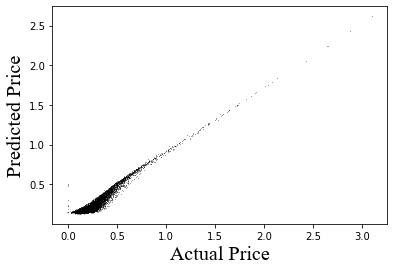

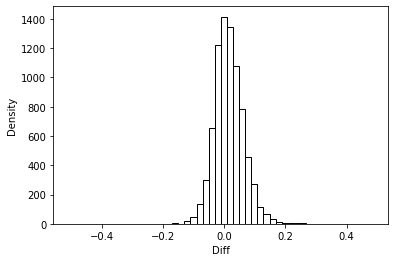

{'diff': 2694   -0.019620
 5140   -0.059515
 2568    0.027878
 3671    0.025291
 7427   -0.076739
           ...   
 2895    0.042584
 7813    0.040202
 905     0.042295
 5192    0.059122
 235     0.012734
 Name: C, Length: 8000, dtype: float64}

In [43]:
y_train_hat = model.predict(X_train)
#reduce dim (240000,1) -> (240000,) to match y_train's dim
y_train_hat = np.squeeze(y_train_hat)
CheckAccuracy(y_train, y_train_hat)